In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('machineLearningBasic/datasets/ChurnData.csv')

In [4]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
df.shape

(200, 28)

In [7]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [12]:
# 마지막 컬럼(churn) 빼고 저장
X = df.iloc[:, :-1].values.astype('float32')

In [19]:
X

array([[11.   , 33.   ,  7.   , ...,  3.033,  4.913,  4.   ],
       [33.   , 33.   , 12.   , ...,  3.24 ,  3.497,  1.   ],
       [23.   , 30.   ,  9.   , ...,  3.24 ,  3.401,  3.   ],
       ...,
       [ 6.   , 32.   , 10.   , ...,  3.168,  3.85 ,  3.   ],
       [24.   , 30.   ,  0.   , ...,  3.866,  3.219,  4.   ],
       [61.   , 50.   , 16.   , ...,  3.24 ,  5.247,  2.   ]],
      dtype=float32)

In [14]:
# 마지막 컬럼만 저장
y = df.iloc[:, -1].values.astype('float32')

In [15]:
y.shape

(200,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[ 0.7054941 ,  0.6049425 ,  1.8094964 , ...,  0.01918964,
        -0.23602317, -1.3301597 ],
       [ 0.0588874 , -0.61832196, -0.7301477 , ...,  0.01918964,
        -0.35521206, -0.40079045],
       [ 1.5368458 ,  0.06976431,  1.1999818 , ...,  0.01918964,
        -1.3420459 , -1.3301597 ],
       ...,
       [-0.81865036, -1.2299542 , -0.7301477 , ...,  0.26941612,
        -0.9396228 , -1.3301597 ],
       [-0.72627795, -1.2299542 , -0.7301477 , ..., -1.5599449 ,
        -0.6333198 , -1.3301597 ],
       [-0.44916078, -0.1595978 ,  0.38729572, ..., -0.6029962 ,
         0.08822223,  0.52857876]], dtype=float32)

In [21]:
X_test = sc.transform(X_test)

In [37]:
print(X_train.shape)
print(X_test.shape)

(160, 27)
(40, 27)


In [26]:
clf = LogisticRegression(solver='lbfgs')

In [27]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.75

In [32]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2) #x축과 y축

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [40]:
# 위에 StandardScaler 랑 비교했을떄 feature 가 27->2 로 줄어듬 feature 압축
print(X_train_pca.shape)
print(X_test_pca.shape)

(160, 2)
(40, 2)


In [63]:
pca.components_.T[:,0]

array([0.25600907, 0.15467404, 0.14334619, 0.0382724 , 0.02140035,
       0.16633436, 0.01499218, 0.22220863, 0.17952476, 0.24039459,
       0.24267167, 0.07990344, 0.26413584, 0.22235309, 0.24534033,
       0.2760699 , 0.2717844 , 0.19831498, 0.2084311 , 0.00447077,
       0.19019867, 0.20007426, 0.02492953, 0.24517813, 0.18749441,
       0.0890279 , 0.2514129 ], dtype=float32)

In [64]:
pca.explained_variance_ratio_

array([0.27124208, 0.19601065], dtype=float32)

In [65]:
clf2 = LogisticRegression(solver='lbfgs')

In [74]:
y_train.shape

(160,)

In [66]:
clf2.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
y_pred_pca = clf2.predict(X_test_pca)

In [68]:
accuracy_score(y_test, y_pred_pca)

0.725

In [69]:
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


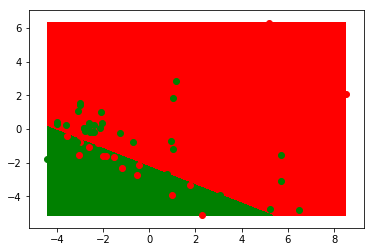

In [72]:
x = X_train_pca
y = y_train

xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(),0.01),
                     np.arange(x[:,1].min(), x[:,1].max(),0.01))
xy = np.column_stack([xx.ravel(), yy.ravel()])
Y = clf2.predict(xy)

plt.contourf(xx, yy, Y.reshape(xx.shape), cmap=ListedColormap(('red', 'green')))

for i,j in enumerate(np.unique(y)):
    plt.scatter(x[y == j,0], x[y == j,1], c=ListedColormap(('red', 'green'))(i))